In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms


from vismodel.visualize import visualize_wandb
from vismodel.utils import image_show

In [2]:
# データの前処理
transform = transforms.Compose([
    transforms.ToTensor(),  # 画像をテンソルに変換
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 平均0.5、標準偏差0.5に正規化
])

In [3]:
# CIFAR-10データセットの読み込み
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


[1,  2000] loss: 2.206
[1,  4000] loss: 1.836
[1,  6000] loss: 1.682
[1,  8000] loss: 1.570
[1, 10000] loss: 1.497
[1, 12000] loss: 1.462
conv1 Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
conv2 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
fc1 Linear(in_features=400, out_features=120, bias=True)
fc2 Linear(in_features=120, out_features=84, bias=True)
fc3 Linear(in_features=84, out_features=10, bias=True)
[2,  2000] loss: 1.386
[2,  4000] loss: 1.370
[2,  6000] loss: 1.349
[2,  8000] loss: 1.322
[2, 10000] loss: 1.318
[2, 12000] loss: 1.265
conv1 Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
conv2 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
fc1 Linear(in_features=400, out_features=120, bias=True)
fc2 Linear(in_features=120, out_features=84, bias=True)
fc3 Linear(in_features=84, out_features=10, bias=True)
[3,  2000] loss: 1.197
[3,  4000] loss: 1.214
[3,  6000] loss: 1.194
[3,  8000] loss: 1.184
[3, 10000] loss: 1.219
[3, 12000] loss: 1.177
conv1 Conv2d(3, 6, kernel_size=(

KeyboardInterrupt: 

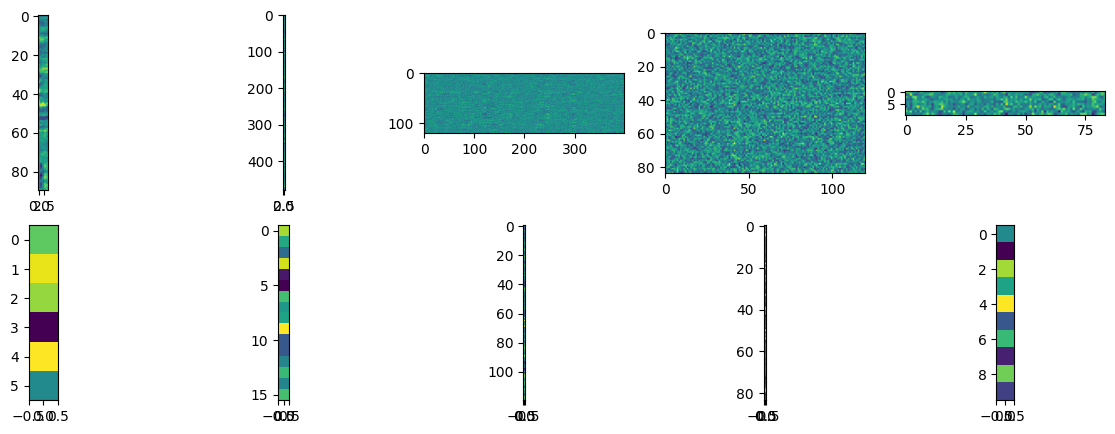

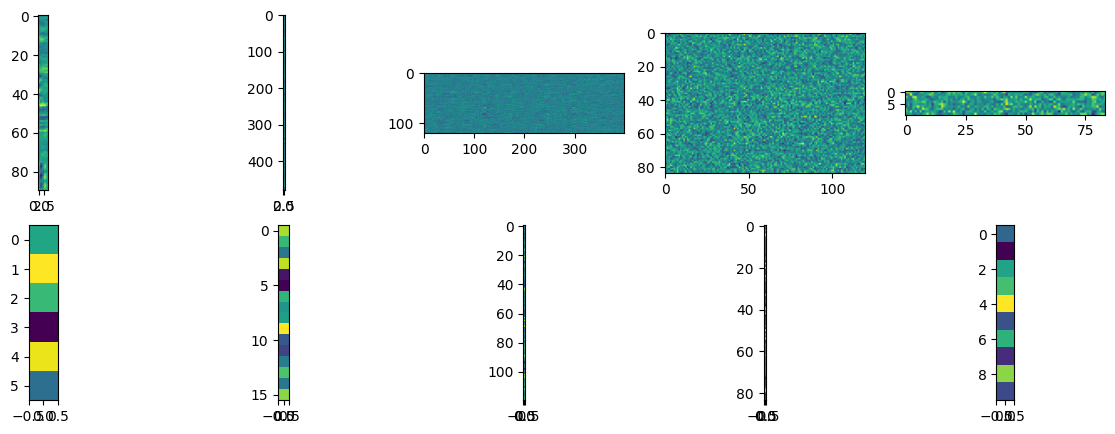

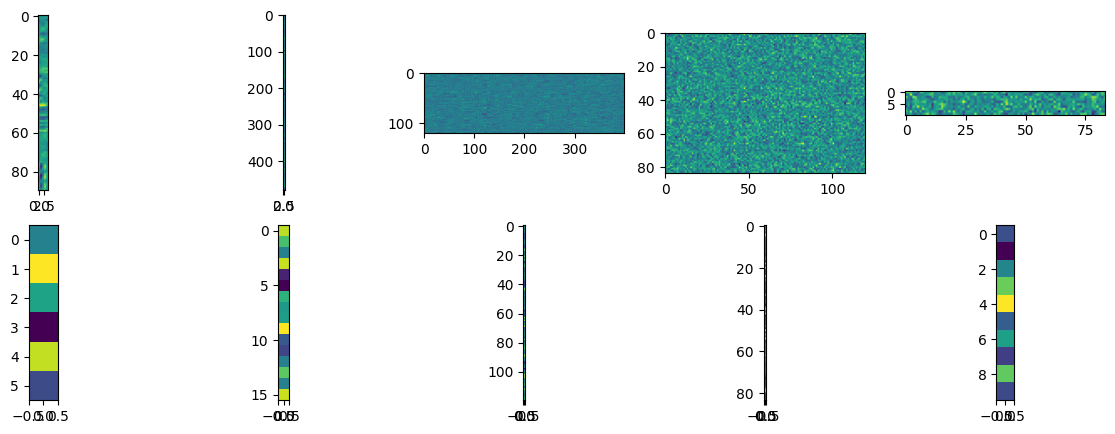

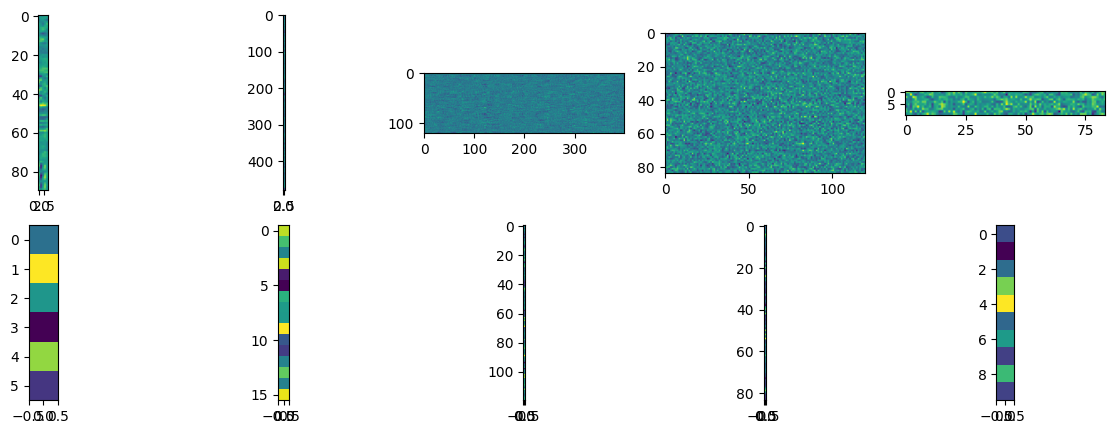

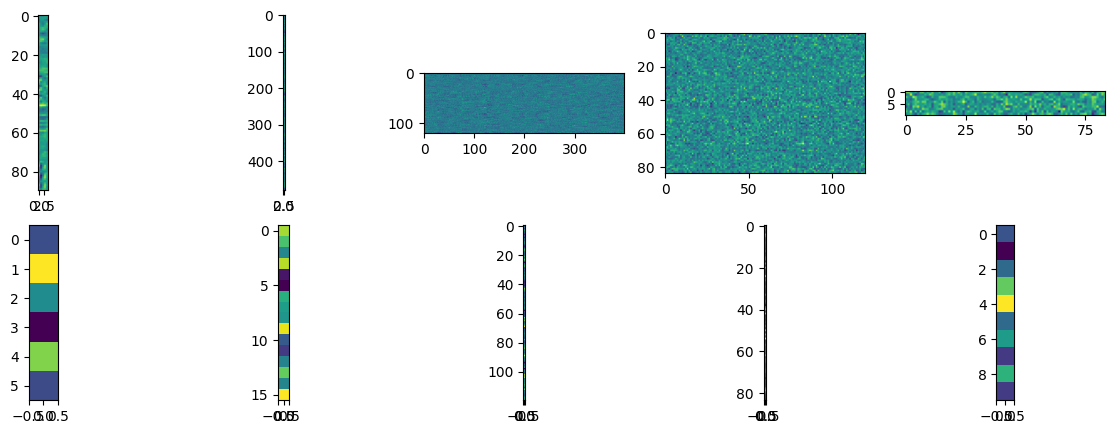

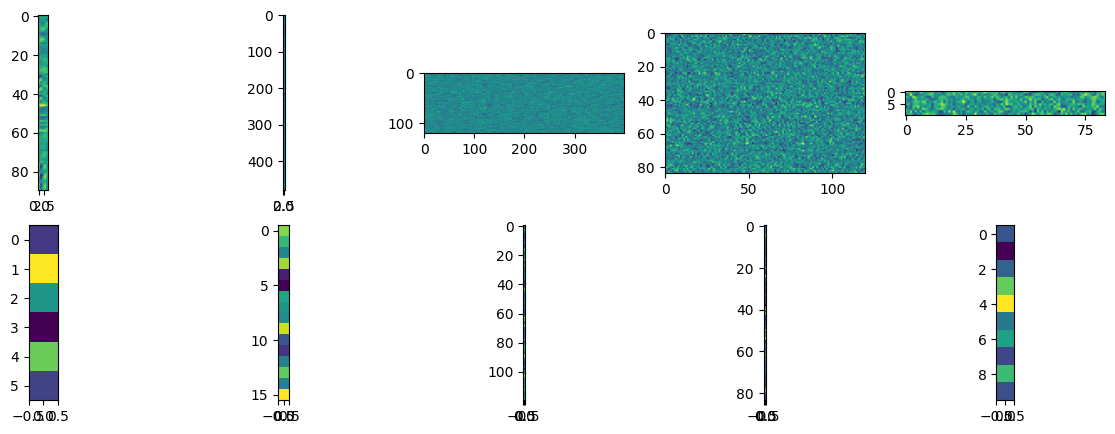

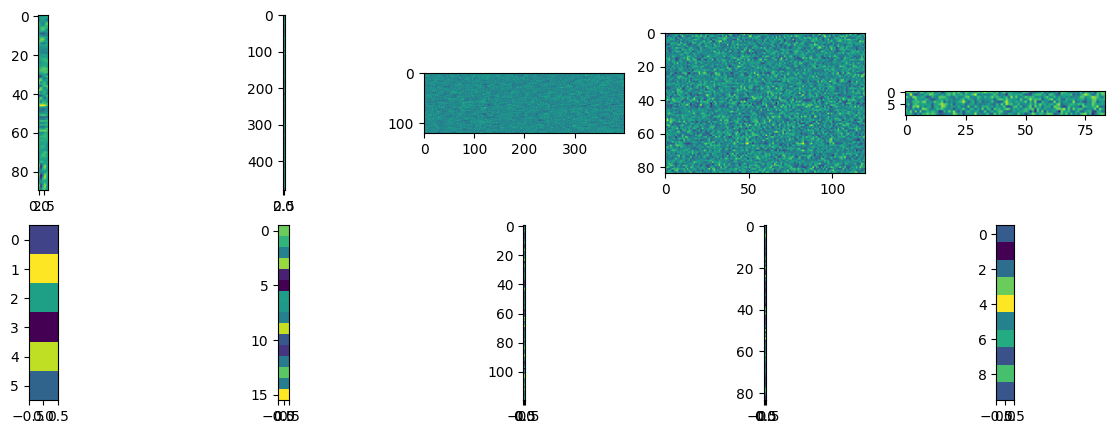

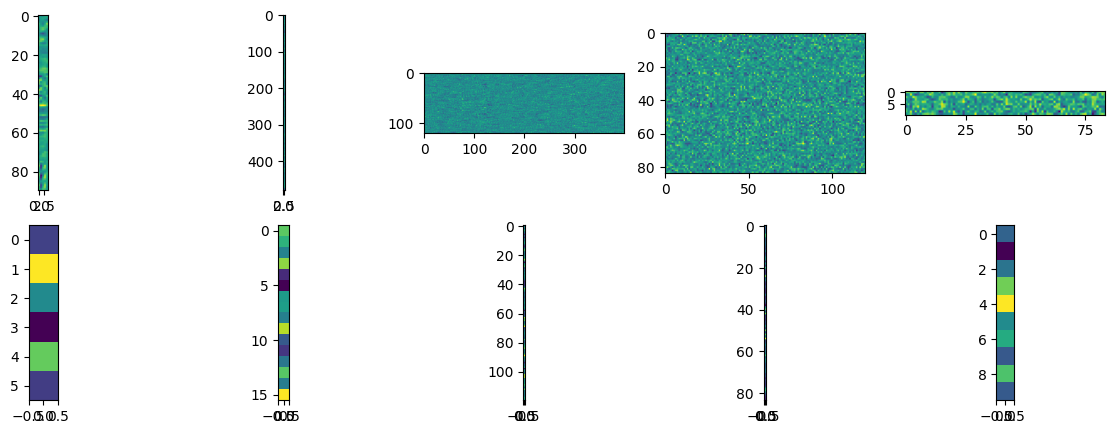

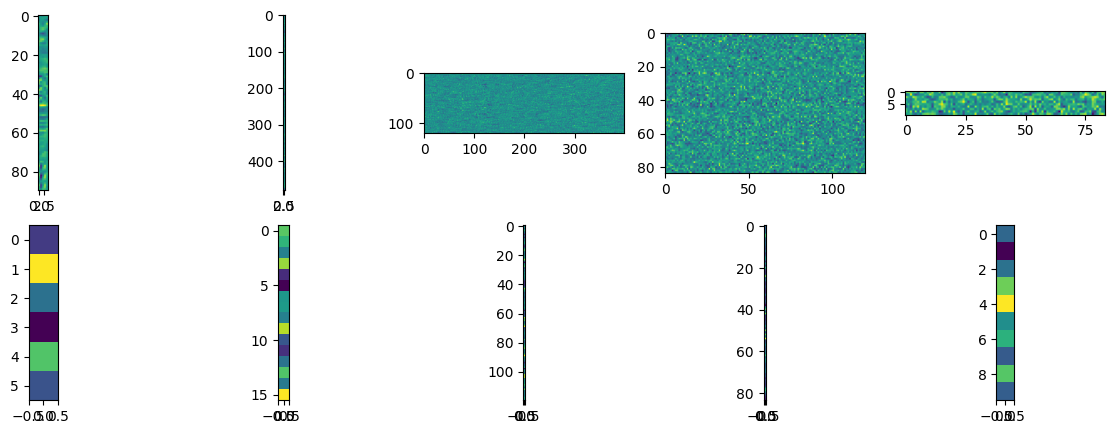

In [7]:
# ニューラルネットワークの定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 入力チャンネル数、出力チャンネル数、カーネルサイズ
        self.pool = nn.MaxPool2d(2, 2)  # カーネルサイズ、ストライド
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 入力サイズ、出力サイズ
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# 損失関数と最適化手法の定義
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# モデルの学習
for epoch in range(100):  # データセットを複数回（2回）通過する
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # 2000ミニバッチごとに出力
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    visualize_wandb(net)

print('Finished Training')

# テストデータでのモデルの精度評価
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

conv1 Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
conv2 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
fc1 Linear(in_features=400, out_features=120, bias=True)
fc2 Linear(in_features=120, out_features=84, bias=True)
fc3 Linear(in_features=84, out_features=10, bias=True)


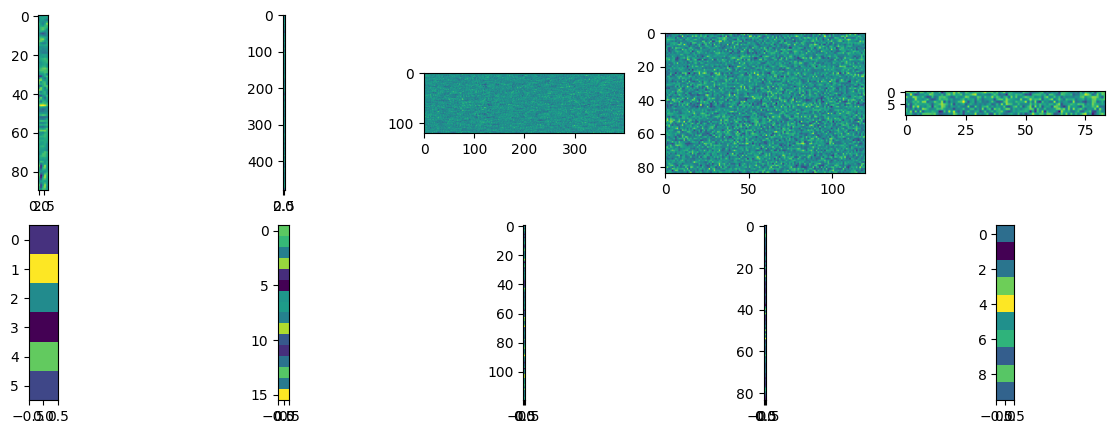

In [8]:
visualize_wandb(net)

In [32]:
net.conv1.weight.shape


torch.Size([6, 3, 5, 5])

In [35]:
net.conv1.bias.unsqueeze(1).shape

torch.Size([6, 1])

conv1 Conv1d(16, 33, kernel_size=(3,), stride=(2,))
fc1 Linear(in_features=12, out_features=20, bias=True)


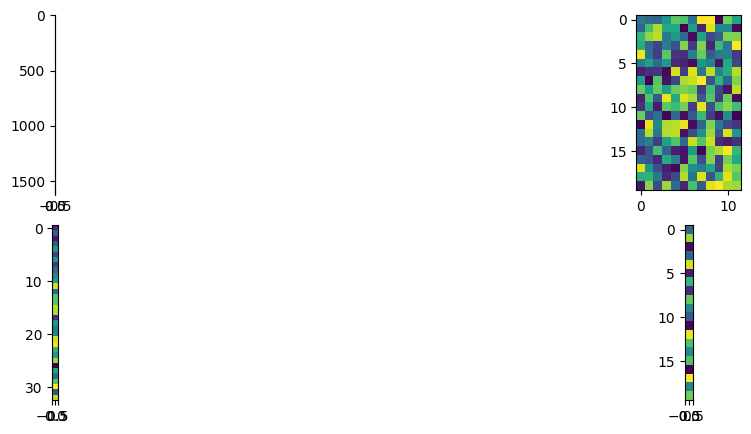

In [9]:
class net1D(nn.Module):
    def __init__(self):
        super(net1D, self).__init__()
        self.conv1 = nn.Conv1d(16, 33, 3,stride=2)  # 入力チャンネル数、出力チャンネル数、カーネルサイズ
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(12, 20)  # 入力サイズ、出力サイズ

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x=F.relu(self.fc1(x))
        return x

m = net1D()
input = torch.randn(20, 16, 50)
output = m(input)
m.conv1.weight.unsqueeze(3).shape

visualize_wandb(m)

In [10]:
m.conv1.bias.unsqueeze(1).shape

torch.Size([33, 1])

In [8]:
input.shape

torch.Size([20, 16, 50])

In [52]:
# With square kernels and equal stride
m = nn.Conv3d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.Conv3d(16, 33, (3, 5, 2), stride=(2, 1, 1), padding=(4, 2, 0))
input = torch.randn(20, 16, 10, 50, 100)
output = m(input)

m.weight.shape

torch.Size([33, 16, 3, 5, 2])

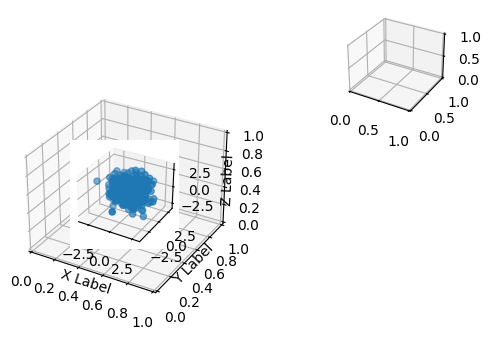

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# データを生成
x = np.random.normal(size=500)
y = np.random.normal(size=500)
z = np.random.normal(size=500)

# プロットを作成
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax = fig.add_subplot(322, projection='3d')
ax = fig.add_subplot(323, projection='3d')
#ax2 = fig.add_subplot(211, projection='3d')
ax.scatter(x, y, z)

# ラベルを設定
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# グラフを表示
plt.show()